In [1]:
import pandas as pd
import re
from sklearn import metrics
from sklearn.cluster import DBSCAN,OPTICS,Birch,KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
import numpy as np
import matplotlib.pyplot as plt 
from functions import *
import math
import hdbscan
plt.style.use(plt.style.available[5])


# to ignore "DtypeWarning", generated due to reading csv files
import warnings
warnings.filterwarnings("ignore")


In [2]:
# part 3

products_DataSet = pd.read_csv('Data set/PRODUCTS.csv')

productInstance_DataSet = pd.read_csv('Data set/PRODUCTINSTANCE.csv', encoding='cp1252')

productInstance = productInstance_DataSet[['M_PRODUCT_ID',"BOOKVALUE","PRIMALVALUE"]].copy()
products = products_DataSet[['M_PRODUCT_ID','NAME',"VALUE"]].copy()

In [3]:

print("*****************running*******************")
ls = []
for i,record in enumerate(products['NAME']):
    s1 = re.search(' . .',record)
    s2 = re.search(' .',record)
    if s1 :
        if s1.end() == len(record) and s1.start() == len(record)-4:

            if type(products.VALUE[i]) != type(1):
                try:
                    products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 
                    products.VALUE[i] /= 100000000

                except ValueError:
                    products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-8]


    elif s2 :
        if s2.end() == len(record) and s2.start() == len(record)-2:
            if type(products.VALUE[i]) != type(1):
                try:
                    products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 
                    products.VALUE[i] /= 10000

                except ValueError:
                    products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-4]
                    products.VALUE[i] = int(products.VALUE[i])


    try:
        products.VALUE[i] = pd.to_numeric(products.VALUE[i]) 

    except ValueError:
        products.VALUE[i] = products.VALUE[i][:len(products.VALUE[i])-4]
        products.VALUE[i] = pd.to_numeric(products.VALUE[i], errors='coerce') 
    

products['VALUE'] = products['VALUE'].astype('float64')


*****************running*******************


In [4]:

merged = pd.merge(left=products,right=productInstance,how='inner',left_on='M_PRODUCT_ID',right_on='M_PRODUCT_ID')


cleanData = merged[['NAME',"VALUE",'BOOKVALUE','PRIMALVALUE']].dropna()

Xc = cleanData[['VALUE','BOOKVALUE','PRIMALVALUE']].copy()




In [5]:
X = Xc.to_numpy()

X_train_np, X_test_np = train_test_split(X,test_size=0.3,shuffle=True,random_state=40)
 # type: ignore
# X_train_np = X_train.to_numpy()
#  # type: ignore
# X_test_np = X_test.to_numpy()
 # type: ignore


In [6]:

standard = MinMaxScaler().fit(X[:,:2])
train = standard.transform(X_train_np[:,:2])
test = standard.transform(X_test_np[:,:2])


In [7]:
# from yellowbrick.cluster import KElbowVisualizer

# # Generate synthetic dataset with 8 random clusters

# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(30,70))

# visualizer.fit(train)        # Fit the data to the visualizer
# visualizer.show()   
# print(visualizer.elbow_value_)
# 7, 0.576 0.5
# 11, 0.173 0.7
# 34, 0.018 2.2
# 48, 0.008 2.8
# 79 , 0.003 5.0
# 101, 0.002 7.1

In [8]:
# from yellowbrick.cluster import KElbowVisualizer

# # Generate synthetic dataset with 8 random clusters

# # Instantiate the clustering model and visualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(34,50),metric='calinski_harabasz')

# visualizer.fit(train)        # Fit the data to the visualizer
# visualizer.show()   
# print(visualizer.elbow_value_)
# 61 5100990537 4.1
# 20 1472691090 1.5

In [9]:
model = KMeans()
model.n_clusters = 48

kmeans = model.fit(train)

print(kmeans.labels_)
train_labels = kmeans.labels_
# print(kmeans.cluster_centers_)








[ 8 17  1 ... 40  8  1]


In [10]:

maxBoundary = len(test)
index = []
test_ls = []
for i in range(10):
    ind = random_int(0,maxBoundary)
    test_ls.append(test[ind])
    index.append(ind)


test_ls = np.asarray(test_ls)
predictions = kmeans.predict(test)

# print(index)
# print(f"labels: {predictions[index]}")

# print(f"soft cluster scores: {strengths}")

# figure = plt.figure(figsize=(9,7))
# plt.scatter(train[:,0],train[:,1],c=train_labels, s=200)
# plt.scatter(test[index, 0], test[index, 1], c=predictions,s=100)
# plt.title("Optimal Number of Clusters")
# plt.show()
# plt.savefig('Kmeans-results.png')
# o = metrics.silhouette_score(test, predictions)

# print(f"Silhouette Coefficient: {o}")


# figure = plt.figure(figsize=(9,7))
# plt.title("train result")
# plt.scatter(train[:,0],train[:,1],c=train_labels_, s=200)
# plt.show()

print(f"Silhouette Coefficient (train): {metrics.silhouette_score(train, train_labels):.3f}")
print(f"Silhouette Coefficient (test): {metrics.silhouette_score(test, predictions):.3f}")


Silhouette Coefficient (train): 0.851
Silhouette Coefficient (test): 0.853


21319
21319 21319


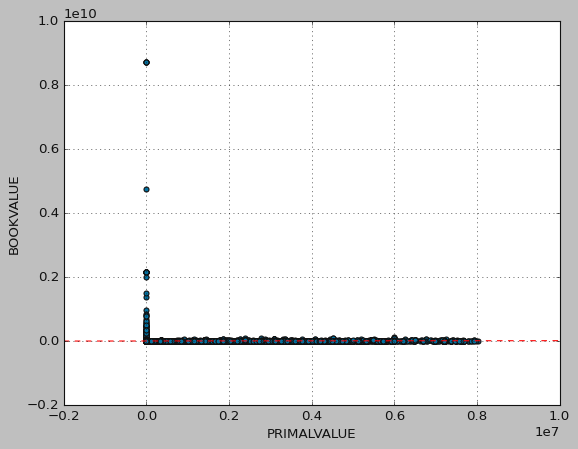

In [11]:
maxBoundary = len(test)
test_record_ind = random_int(0,maxBoundary)
TRI_lbl = predictions[test_record_ind]

cluster_index = []
for i,lbl in enumerate(train_labels):
    if lbl == TRI_lbl:
        cluster_index.append(i)

print(len(cluster_index))
# Xr = cleanData[["VALUE",'BOOKVALUE','PRIMALVALUE']].copy()
# Xr_np = Xr.to_numpy()

# print(X_train_np.shape)
# print(X_train_np[1])

x1 = X_train_np[cluster_index,1]
y1 = X_train_np[cluster_index,2]
print(len(x1),len(y1))
plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))
plt.xlabel('PRIMALVALUE')
plt.ylabel('BOOKVALUE')
plt.scatter(x1,y1)
ax = plt.gca()
ax.grid(True)
# ax.set_aspect('equal', adjustable='box')
plt.show()


In [12]:
from sklearn import linear_model

regressor = linear_model.LinearRegression(positive=True)
# print(len(x1),len(y1))
x1r = x1.reshape((-1,1))
# y1r = y1.reshape((-1,1))
# print(len(x1r),len(y1))
regressor.fit(x1r,y1)
print("Coefficients: \n    ", regressor.coef_)

x2 = X_test_np[test_record_ind,1]

y2 = regressor.predict(np.reshape(x2,(1,-1)))

print("the predicted price is: ",y2)




Coefficients: 
     [0.07106983]
the predicted price is:  [7913828.12014487]
